In [3]:
# Necessary Modules
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pathlib import Path

In [4]:
#Read in csv data
df=pd.read_csv(Path('./fraud_transactions.csv'))

#Review dataframe
df.head()

,GEO_Score,PROD_Score,y
0,19.997056,0.102230,0
1,7.076726,-3.820771,0
2,-17.707267,-3.430517,1
3,13.190588,-7.243853,0
4,3.936697,-4.589524,0


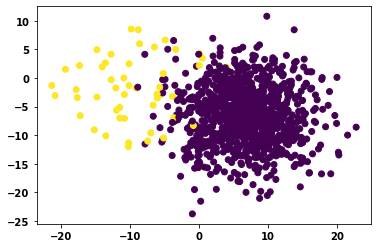

In [6]:
# Scatter plot the data to view the groupings
plt.scatter(
    
    # one feature on the x-axis
    x=df['GEO_Score'],
    
    #Another feature on the y-axis
    y=df['PROD_Score'],
    
    #and the y variable will be used to discern the color
    c=df['y']
)

In [7]:
# Separate data into y and x
y=df['y']

#x should be all the features
x=df.drop(columns='y')

In [8]:
#Fit the model using train_test_split and fitting a logistic regression model

x_train,x_test,y_train,y_test = train_test_split(x,y)

logistic_regression_model=LogisticRegression()

logistic_regression_model.fit(x_train,y_train)

LogisticRegression()

In [10]:
#Now use predict on the training and testing sets to produce a list of values the model predicts
training_predictions=logistic_regression_model.predict(x_train)

testing_predictions=logistic_regression_model.predict(x_test)

In [11]:
#Import a new module to be used called confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

training_matrix=confusion_matrix(y_train, training_predictions)
print(training_matrix)

[[749   3]
 [ 12  23]]


In [13]:
# classification_report from sklearn can be used to calculate the metrics for our model more easily
from sklearn.metrics import classification_report

training_report=classification_report(y_train,training_predictions)

print(training_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       752
           1       0.88      0.66      0.75        35

    accuracy                           0.98       787
   macro avg       0.93      0.83      0.87       787
weighted avg       0.98      0.98      0.98       787



In [14]:
#Save a confusion matrix for test labels
testing_matrix=confusion_matrix(y_test,testing_predictions)

testing_report=classification_report(y_test,testing_predictions)

print(testing_matrix)
print(testing_report)

[[248   0]
 [  5  10]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       248
           1       1.00      0.67      0.80        15

    accuracy                           0.98       263
   macro avg       0.99      0.83      0.90       263
weighted avg       0.98      0.98      0.98       263

